In [83]:
import pandas as pd
df1 = pd.read_csv('./data/emoji_cleaned.csv')
df1.head()

,Tweet,Label
0,a little throwback with my favourite person w...,0
1,glam on yesterday for kcon makeup using in f...,7
2,democracy plaza in the wake of a stunning outc...,11
3,then amp now vilo walt disney magic kingdom,0
4,who never a galaxy far far away,2


In [84]:
df1.isnull().Tweet.value_counts()

False    49999
True         1
Name: Tweet, dtype: int64

In [85]:
df1 = df1[df1['Tweet'].notna()]

In [86]:
df1.isnull().Tweet.value_counts()

False    49999
Name: Tweet, dtype: int64

In [87]:
import nltk
import spacy
from nltk.stem import WordNetLemmatizer

nlp = spacy.load("en_core_web_sm")
lemmatizer = WordNetLemmatizer()

def tweet_preprocessing(tweet, nlp=nlp, lemmatizer=lemmatizer):
    
    stop_words = nlp.Defaults.stop_words     
    rm_stop_words_lemma = []
    
    doc = nlp(tweet)
    for token in doc:                                            # tokenization
        if token.text not in stop_words and token.pos_!="PUNCT": 
            lemma_word = lemmatizer.lemmatize(token.text)        # removing stop
            rm_stop_words_lemma.append(lemma_word)               # lemmatizing words 
            
    processed = " ".join(rm_stop_words_lemma)
    return processed

In [88]:
#df1["Tweet"] = df1["Tweet"].apply(tweet_preprocessing)
#df1.head(10)

In [89]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1,test_size=0.2,random_state=99, shuffle = True, stratify = df1.Label)
train.shape, test.shape


((39999, 2), (10000, 2))

In [90]:
trainX, trainY = train['Tweet'], train['Label']
testX, testY = test['Tweet'], test['Label']

In [91]:
trainX.shape, trainY.shape, testX.shape,testX.shape

((39999,), (39999,), (10000,), (10000,))

In [92]:
print('in training set:\n',trainY.value_counts(normalize=True))
print('in testing set:\n',testY.value_counts(normalize=True))


in training set:
 0     0.215180
1     0.105578
2     0.104828
3     0.057701
4     0.050326
5     0.046351
6     0.040976
7     0.037876
8     0.035926
9     0.033426
10    0.030876
11    0.030551
12    0.029251
14    0.027551
13    0.026926
16    0.026126
18    0.025726
17    0.025576
15    0.024976
19    0.024276
Name: Label, dtype: float64
in testing set:
 0     0.2152
1     0.1056
2     0.1048
3     0.0577
4     0.0504
5     0.0463
6     0.0410
7     0.0379
8     0.0359
9     0.0334
10    0.0309
11    0.0306
12    0.0292
14    0.0275
13    0.0269
16    0.0261
18    0.0257
17    0.0256
15    0.0250
19    0.0243
Name: Label, dtype: float64


In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

In [94]:
vect = TfidfVectorizer(
#                ngram_range = (1,4),
                stop_words = 'english',
                smooth_idf = 1,
                max_features = 1000
            )

# sparse matrix for NB Classifier
train_matrix = vect.fit_transform(trainX)
test_matrix = vect.transform(testX)

In [95]:
vocab = vect.vocabulary_
stopwords = vect.stop_words_
#print('The type of vect is: ',type(vocab),'\n','the size of the corpus is: ',len(vocab),'\n','the size of the stop words is: ',len(stopwords),'\n','The stop words include:\n',stopwords)


In [96]:
##Find best K 

In [97]:
import time
k_range = range(1,20)
scores = []

# find the best k value in k_range
for k in k_range:
    print("k = " + str(k) + " begin ")
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_matrix,trainY)
    test_pred = knn.predict(test_matrix)
    acc = (test_pred == testY).value_counts(normalize=True)
    accuracy = acc.loc[True]
    scores.append(accuracy)
    end = time.time()
    print("Complete time: " + str(end-start) + " Secs.")

k = 1 begin 
Complete time: 7.566381931304932 Secs.
k = 2 begin 
Complete time: 8.487223148345947 Secs.
k = 3 begin 
Complete time: 9.097187995910645 Secs.
k = 4 begin 
Complete time: 9.527091979980469 Secs.
k = 5 begin 
Complete time: 9.748111963272095 Secs.
k = 6 begin 
Complete time: 9.623028039932251 Secs.
k = 7 begin 
Complete time: 9.75593090057373 Secs.
k = 8 begin 
Complete time: 9.722548961639404 Secs.
k = 9 begin 
Complete time: 9.458465099334717 Secs.
k = 10 begin 
Complete time: 9.913420915603638 Secs.
k = 11 begin 
Complete time: 10.227094173431396 Secs.
k = 12 begin 
Complete time: 10.462055921554565 Secs.
k = 13 begin 
Complete time: 9.506531953811646 Secs.
k = 14 begin 
Complete time: 8.980633020401001 Secs.
k = 15 begin 
Complete time: 9.151830911636353 Secs.
k = 16 begin 
Complete time: 8.970248937606812 Secs.
k = 17 begin 
Complete time: 8.976711750030518 Secs.
k = 18 begin 
Complete time: 9.307884693145752 Secs.
k = 19 begin 
Complete time: 9.34975004196167 Secs.


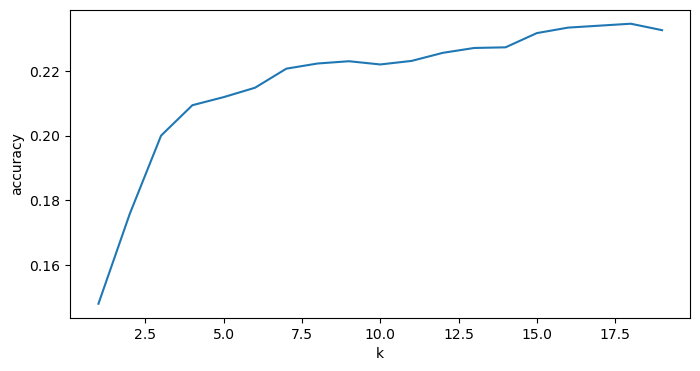

In [98]:
import matplotlib.pyplot as plt 
k_range = range(1,20)
plt.figure(figsize=(8,4))
plt.plot(k_range,scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [99]:
knn = KNeighborsClassifier(n_neighbors=16)

In [102]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, train_matrix, trainY, cv=5)
print(scores)

[0.224625   0.22075    0.224875   0.22675    0.22577822]


In [103]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(train_matrix,trainY)
train_pred = knn.predict(train_matrix)
test_pred = knn.predict(test_matrix)

print((train_pred == trainY).value_counts(normalize=True))
print((test_pred == testY).value_counts(normalize=True))

False    0.697442
True     0.302558
Name: Label, dtype: float64
False    0.7666
True     0.2334
Name: Label, dtype: float64


In [25]:
"""
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

cm = confusion_matrix(testY, test_pred)
plot_confusion_matrix(cm, [i for i in range(20)] , normalize=True,cmap=plt.cm.Greys)

"""

'\nfrom sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix\n\ncm = confusion_matrix(testY, test_pred)\nplot_confusion_matrix(cm, [i for i in range(20)] , normalize=True,cmap=plt.cm.Greys)\n\n'

Text(283.22222222222223, 0.5, 'Truth')

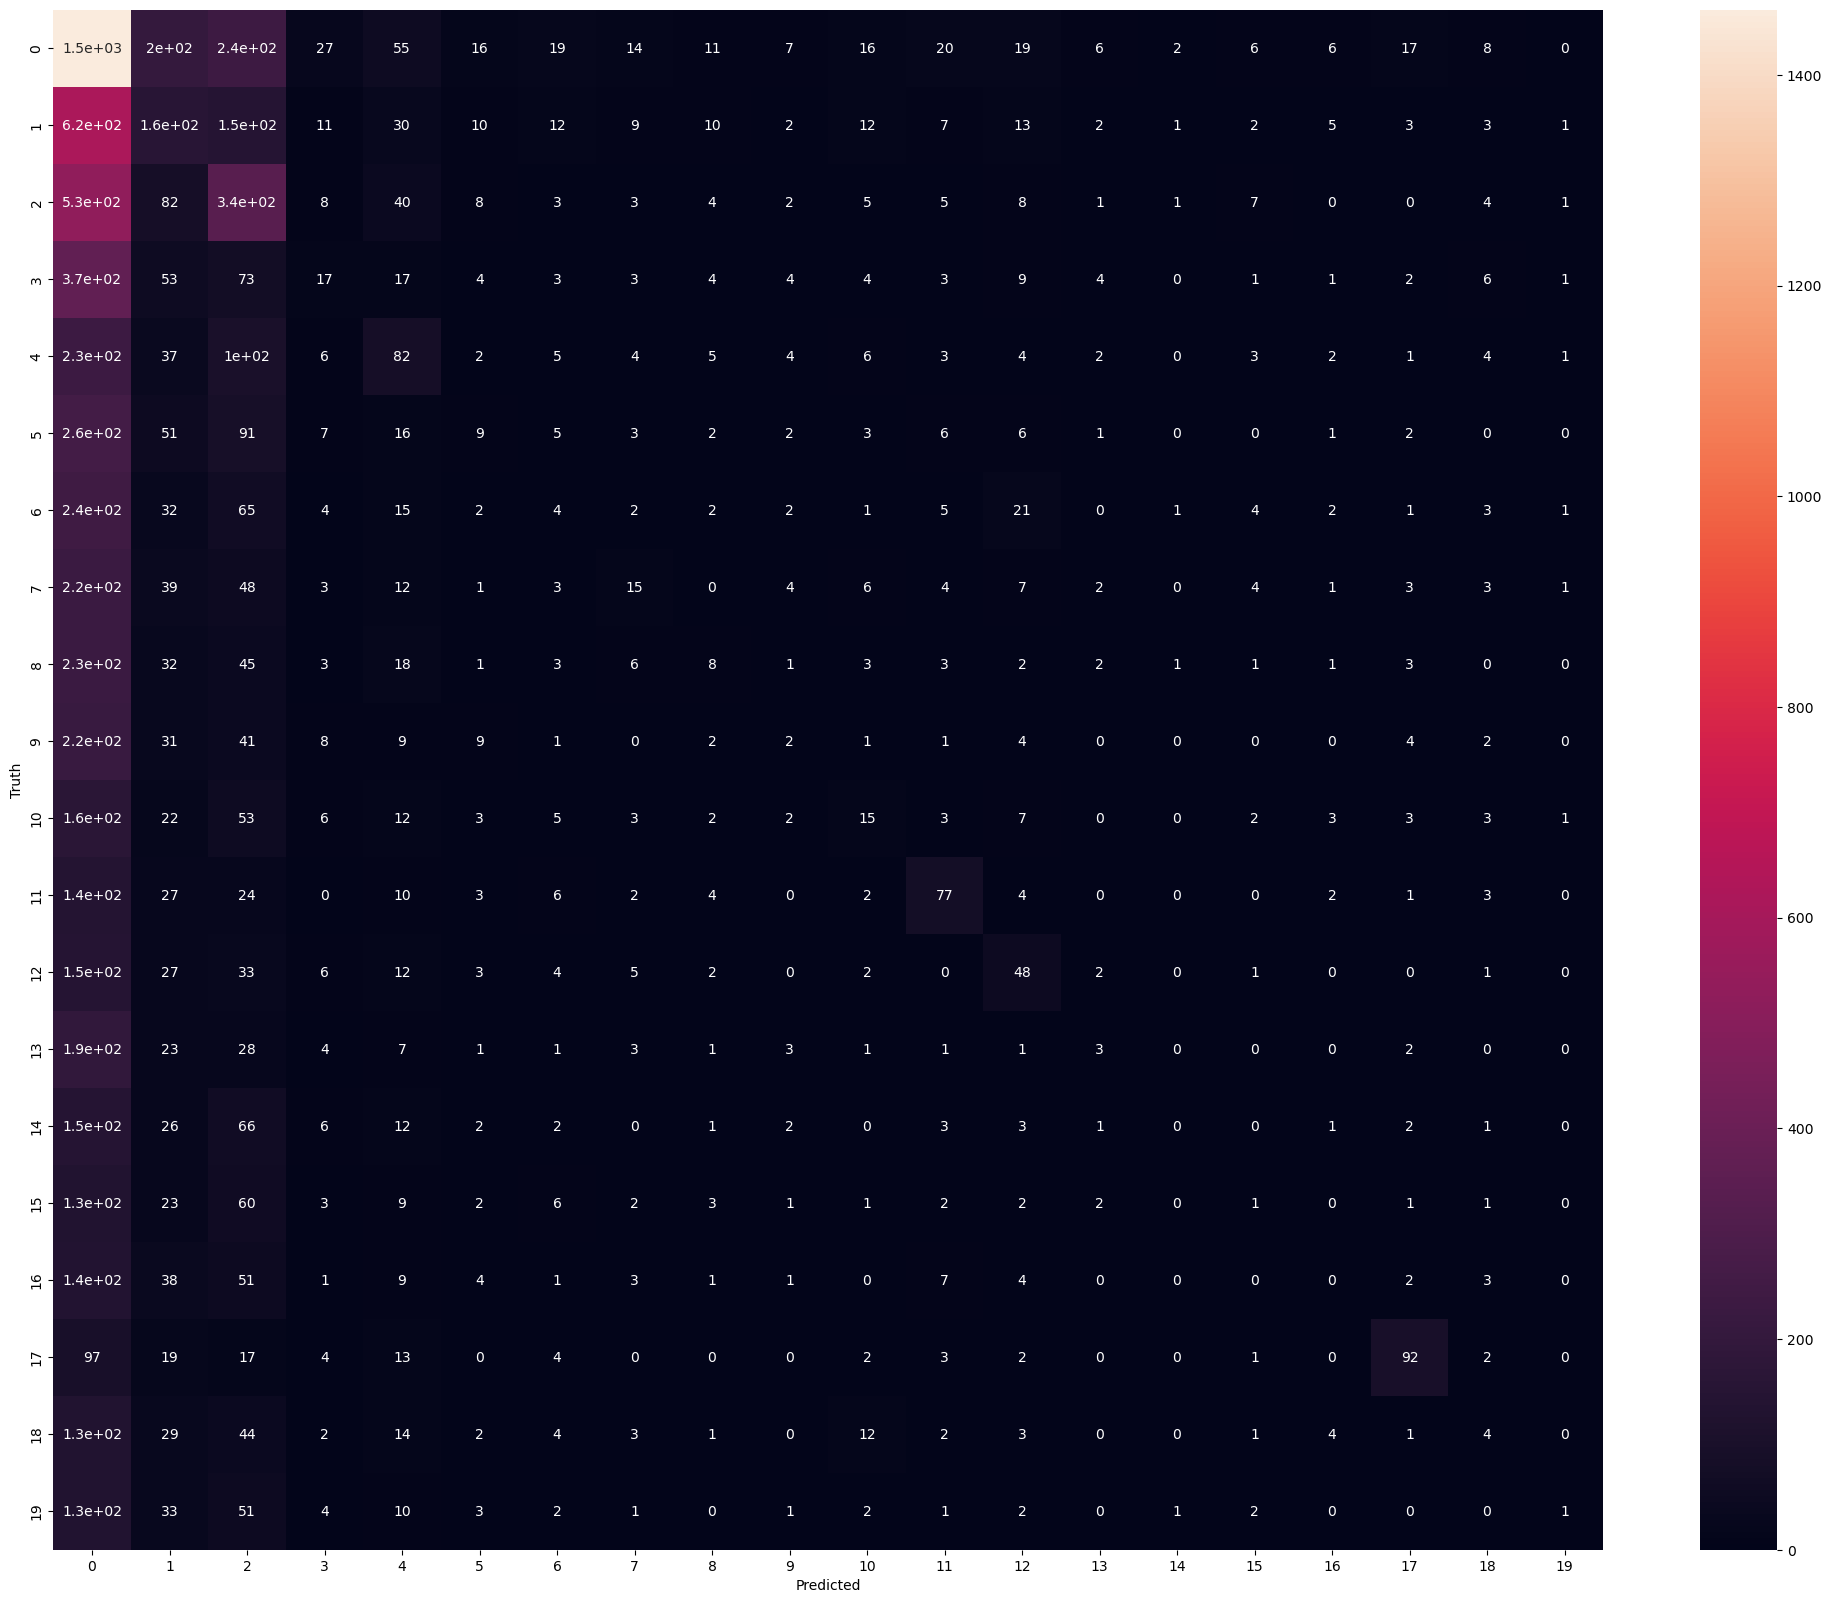

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, test_pred)
# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (25,20))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [126]:
### KNN with Word2Vec && Cross Validation ###
########################################

In [127]:
import pandas as pd
df2 = pd.read_csv('./data/emoji_cleaned.csv')
df2.head()

,Tweet,Label
0,a little throwback with my favourite person w...,0
1,glam on yesterday for kcon makeup using in f...,7
2,democracy plaza in the wake of a stunning outc...,11
3,then amp now vilo walt disney magic kingdom,0
4,who never a galaxy far far away,2


In [128]:
df2.isnull().Tweet.value_counts()

False    49999
True         1
Name: Tweet, dtype: int64

In [129]:
df2 = df2[df2['Tweet'].notna()]

In [130]:
df2.isnull().Tweet.value_counts()

False    49999
Name: Tweet, dtype: int64

In [131]:
import string
import re

def tweet_clean(tweet):
    tweet = str(tweet).lower()
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet)                       # remove @mentions
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention)                             # remove RT
    rm_links = re.sub(r'http\S+', '', rm_rt)                               # remove hyperlinks
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    rm_nums = re.sub('[0-9]+', '', rm_links)                               # remove numbers
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # remove punctuations
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned

In [132]:
tweet = df2['Tweet'][2]
cleaned = tweet_clean(tweet)

print("Cleaned : ",cleaned)

Cleaned :  democracy plaza in the wake of a stunning outcome decision  nbc news


In [133]:
df2["Tweet"] = df2["Tweet"].apply(tweet_clean)
df2.head(5)

,Tweet,Label
0,a little throwback with my favourite person w...,0
1,glam on yesterday for kcon makeup using in f...,7
2,democracy plaza in the wake of a stunning outc...,11
3,then amp now vilo walt disney magic kingdom,0
4,who never a galaxy far far away,2


In [134]:
#!pip3 install -U spacy
#!pip install keras==2.6.*
#!pip3 install -U nltk
import nltk
import spacy
import keras
from nltk.stem import WordNetLemmatizer

nlp = spacy.load("en_core_web_sm")
lemmatizer = WordNetLemmatizer()

def tweet_preprocessing(tweet, nlp=nlp, lemmatizer=lemmatizer):
    
    stop_words = nlp.Defaults.stop_words     
    rm_stop_words_lemma = []
    
    doc = nlp(tweet)
    for token in doc:                                            # tokenization
        if token.text not in stop_words and token.pos_!="PUNCT": 
            lemma_word = lemmatizer.lemmatize(token.text)        # removing stop
            rm_stop_words_lemma.append(lemma_word)               # lemmatizing words 
            
    processed = " ".join(rm_stop_words_lemma)
    return processed

In [135]:
tweet = df2['Tweet'][2]
cleaned = tweet_clean(tweet)

print("Sample    : ",cleaned)
print("Processed : ",tweet_preprocessing(cleaned))

Sample    :  democracy plaza in the wake of a stunning outcome decision  nbc news
Processed :  democracy plaza wake stunning outcome decision   nbc news


In [136]:
df2["Tweet"] = df2["Tweet"].apply(tweet_preprocessing)
df2.head(10)

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam yesterday kcon makeup featherette,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,galaxy far far away,2
5,dinner fla tonight panseared salmon couscous...,1
6,fav senior game congrats beating west west s...,8
7,got formal best friend phi mu jsu,0
8,cause miss little homies throwback cousinlove ...,13
9,birthday kiss madison wisconsin,9


In [146]:
X=df2['Tweet']
Y=df2['Label']
X.shape, Y.shape

((49999,), (49999,))

In [149]:

from gensim.models import Word2Vec
from tqdm import tqdm
words_in_sentences=[]
for i in tqdm(X):
    words_in_sentences.append(i.split())


100%|█████████████████████████████████| 49999/49999 [00:00<00:00, 136836.61it/s]


In [150]:

print("Model Training Started...")
model = Word2Vec(sentences=words_in_sentences, vector_size=200,workers=-1)
print("Model Training Completed...")


Model Training Started...
Model Training Completed...


In [169]:
from gensim.models import Word2Vec
tokenized_tweet = X.apply(lambda X: X.split()) # tokenizing

model_w2v = Word2Vec(
            tokenized_tweet,
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(X), epochs=20)

(5422230, 6573060)

In [170]:
len(tokenized_tweet)

49999

In [160]:
model_w2v.wv.most_similar(positive="dinner")

[('lunch', 0.6573513150215149),
 ('fuddruckers', 0.6063383221626282),
 ('medieval', 0.5812950730323792),
 ('kobe', 0.5771948099136353),
 ('geisha', 0.5762340426445007),
 ('scottys', 0.573097825050354),
 ('pappasitos', 0.5705630779266357),
 ('bentobox', 0.56817626953125),
 ('trattoria', 0.5676859021186829),
 ('umi', 0.5654054880142212)]

In [171]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [173]:
import numpy as np

def average_words_vectors(tokens, wv_model):
    vectors = [wv_model[word] for word in tokens 
               if word in wv_model]  # avoiding KeyError
    return np.array(vectors).mean(axis=0)

In [177]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = average_words_vectors(tokenized_tweet[i], model_w2v.wv)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

ValueError: could not broadcast input array from shape (100,) into shape (200,)

In [ ]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier

# Read in your data as a Pandas dataframe
df = pd.read_csv('tweet_emoji_data.csv')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['emoji'], test_size=0.2)

# Vectorize the tweets using word2vec
w2v_model = Word2Vec(X_train, min_count=1)
X_train_vec = [w2v_model.wv[tweet] for tweet in X_train]
X_test_vec = [w2v_model.wv[tweet] for tweet in X_test]

# Train a KNN model on the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)

# Test the model on the test data
accuracy = knn.score(X_test_vec, y_test)

# Print the model's accuracy
print(f'The model's accuracy is {accuracy:.2f}')


In [162]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.20,random_state=101)

In [163]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((39999,), (10000,), (39999,), (10000,))

In [142]:
#from gensim.models import Word2Vec
#model = Word2Vec(x_train, size=100, window=5, min_count=1, workers=4)

In [79]:
#model.wv.most_similar('interesting', topn=10)

[('navy', 0.2874569594860077),
 ('aurora', 0.23562674224376678),
 ('entire', 0.2267521172761917),
 ('plano', 0.22555238008499146),
 ('budweiser', 0.21815267205238342),
 ('supporter', 0.21537961065769196),
 ('intention', 0.2131328284740448),
 ('regram', 0.21223405003547668),
 ('cheesin', 0.20961609482765198),
 ('aviation', 0.20835918188095093)]

In [80]:
#model.wv.similar_by_word('interesting')

[('navy', 0.2874569594860077),
 ('aurora', 0.23562674224376678),
 ('entire', 0.2267521172761917),
 ('plano', 0.22555238008499146),
 ('budweiser', 0.21815267205238342),
 ('supporter', 0.21537961065769196),
 ('intention', 0.2131328284740448),
 ('regram', 0.21223405003547668),
 ('cheesin', 0.20961609482765198),
 ('aviation', 0.20835918188095093)]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors = 16)#no of neighbors is hpyer parameter
knn2.fit(x_train, y_train)